In [1]:
import os
import math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
x = [20, 27, 21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48] # idade

y = [1000, 1200, 2900, 1850, 900, 950, 2000, 2100, 3000, 5900, 4100, 5100, 7000, 5000, 6500] # salario

In [3]:
len(x)

15

In [4]:
grafico = px.scatter(x=x, y=y, width=800, height=400)
grafico.show()

In [5]:
# transformar de vetor para array (por ser l =! c, matriz)
base_salario = np.array([[x[0], y[0]], [x[1], y[1]], [x[2], y[2]], [x[3], y[3]], [x[4], y[4]], [x[5], y[5]], [x[6], y[6]], [x[7], y[7]], [x[8], y[8]], 
                         [x[9], y[9]], [x[10], y[10]], [x[11], y[11]], [x[12], y[12]], [x[13], y[13]], [x[14], y[14]]])
print(base_salario)

[[  20 1000]
 [  27 1200]
 [  21 2900]
 [  37 1850]
 [  46  900]
 [  53  950]
 [  55 2000]
 [  47 2100]
 [  52 3000]
 [  32 5900]
 [  39 4100]
 [  41 5100]
 [  39 7000]
 [  48 5000]
 [  48 6500]]


In [6]:
# Padronizar valores (K-means necessita)
from sklearn.preprocessing import StandardScaler

In [7]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

KMeans(n_clusters=3)

In [10]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[-1.63312883, -0.77505093],
       [ 0.73953003, -0.72661025],
       [ 0.07703438,  1.11413572]])

In [11]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  22.66666667, 1700.        ],
       [  48.33333333, 1800.        ],
       [  41.16666667, 5600.        ]])

In [12]:
rotulos = kmeans_salario.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [13]:
grafico1 = px.scatter(x=base_salario[:,0], y=base_salario[:,1], width=1100, height=600)
grafico1.show()

In [14]:
# definir o nr. de cluster visualizando o dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0, 0.5, 'Distância')

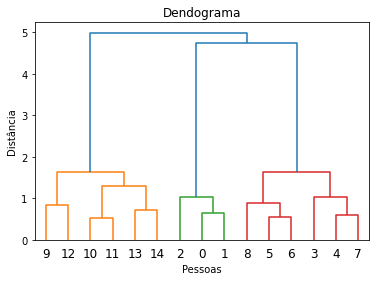

In [15]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância')

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward') # hc: hierarquical clustering

rotulos = hc_salario.fit_predict(base_salario)

In [18]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [19]:
grafico1 = px.scatter(x=base_salario[:,0], y=base_salario[:,1], color=rotulos, width=1100, height=600)
grafico1.show()